In [29]:
prerequisite_dict = {"BT3051":["CS1100", "BT1000"], "CS6024":["BT3051"], "CS6091": ["CS6024", "BT3051", "CS1100"], "CS1100":[], "BT1000":[]}

In [30]:
type(prerequisite_dict)

dict

In [31]:
for i in prerequisite_dict:
    print(i)

BT3051
CS6024
CS6091
CS1100
BT1000


In [32]:
len(prerequisite_dict)

5

In [33]:
print(len(prerequisite_dict['BT3051']))
course_list = []

2


In [39]:
while(len(prerequisite_dict)>0):
    for i in list(prerequisite_dict):
        if(len(prerequisite_dict[i])==0):
            course_list.append(i)
            del prerequisite_dict[i]
        else:
            for j in prerequisite_dict[i]:
                if(j in course_list):
                    prerequisite_dict[i] = [k for k in prerequisite_dict[i] if k!=j]
                    
print(course_list)             

['CS1100', 'BT1000', 'BT3051', 'CS6024', 'CS6091']


In [12]:
l1 = ['CS1100']

In [18]:
print(prerequisite_dict.items())

dict_items([('BT3051', ['CS1100', 'BT1000']), ('CS6024', ['BT3051']), ('CS6091', ['CS6024', 'BT3051', 'CS1100']), ('CS1100', []), ('BT1000', [])])


In [19]:
prerequisite_dict.keys()

dict_keys(['BT3051', 'CS6024', 'CS6091', 'CS1100', 'BT1000'])

In [27]:
for j in prerequisite_dict['BT3051']:
    if(j=='CS1100'):
        prerequisite_dict['BT3051'] = [k for k in prerequisite_dict['BT3051'] if k!='CS1100']
print(prerequisite_dict)

{'BT3051': ['BT1000'], 'CS6024': ['BT3051'], 'CS6091': ['CS6024', 'BT3051', 'CS1100'], 'CS1100': [], 'BT1000': []}


In [36]:
len(prerequisite_dict['BT3051'])

2

In [38]:
prerequisite_dict = {"BT3051":["CS1100", "BT1000"], "CS6024":["BT3051"], "CS6091": ["CS6024", "BT3051", "CS1100"], "CS1100":[], "BT1000":[]}
course_list = []
while(len(prerequisite_dict)>0):
    for i in list(prerequisite_dict):
        if(len(prerequisite_dict[i])==0):
            course_list.append(i)
            del prerequisite_dict[i]
        else:
            for j in prerequisite_dict[i]:
                if(j in course_list):
                    prerequisite_dict[i] = [k for k in prerequisite_dict[i] if k!=j]
                    
print(course_list)

['CS1100', 'BT1000', 'MA1101', 'BT3051', 'CS6024', 'CS6091']


In [1]:
import networkx as nx

In [2]:
prerequisite_dict = {"BT3051":["CS1100", "BT1000"], "CS6024":["BT3051"], "CS6091": ["CS6024", "BT3051", "CS1100"], "CS1100":[], "BT1000":[]}

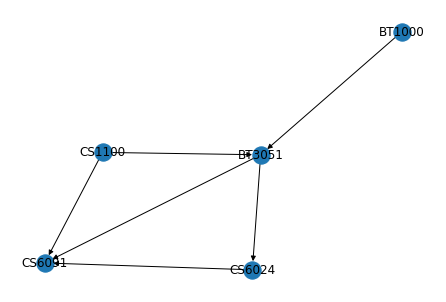

In [9]:
import matplotlib.pyplot as plt
G = nx.DiGraph()
for i in prerequisite_dict.keys():
    G.add_node(i)
    for j in prerequisite_dict[i]:
        if j not in G:
            G.add_node(j)
        G.add_edge(j,i)
nx.draw(G,with_labels = True)
plt.show()

In [11]:
 for i in G:
        print(i)

BT3051
CS1100
BT1000
CS6024
CS6091


In [12]:
(list(G.predecessors('CS6091')))
len(G)

5

In [13]:
ls = []
g = G
while(len(G))!=0:
    for i in list(g):
        if(len(list(G.predecessors(i))))==0:
            ls.append(i)
            G.remove_node(i)
#             G.remove_node(i)
print(ls)

['CS1100', 'BT1000', 'BT3051', 'CS6024', 'CS6091']


In [24]:
import networkx as nx
# Use of any function from networkx.algorithms module is strictly not allowed.
# Other libraries are not allowed expect for matplotlib for visualization purposes

# Add your functions here if needed


def planning_your_program(prerequisite_dict):
    """
    Given a dictionary of prerequisite courses, return the list of courses such that the sequence denotes the order in which the courses could possibly be done in order to satisfy the prerequisite condition.
    """
    
    """ Add your functions here if needed """
    
    def create_dependency_graph(prerequisite_dict):
        """Create and return a networkx dependency graph based on the prerequisite dictionary"""
        G = nx.DiGraph()
        # Add your code here
        for i in prerequisite_dict.keys():
            G.add_node(i) #Add a node for every key present in the dictionary
            for j in prerequisite_dict[i]:
                if j not in G:
                    G.add_node(j) #If the course present in a particular key already exists as a node in graph, don't add it again
                G.add_edge(j,i) #Add en edge from the prerequisite course (if any) to the course which is to be taken
        return G
    
    
    def find_the_program_pathway(G):
        """return the required program pathway from the Course Dependency Graph"""
        # Add your code here
        course_list = []
        g = G
        while(len(G))!=0:
            for i in list(g):
                if(len(list(G.predecessors(i))))==0: #Check if there are any incident edges in for that particular node. If it is zero then add it to the course list
                    course_list.append(i)
                    G.remove_node(i) #Remove the node which has zero incident edges
        
        return course_list 
    
    Course_Dependency_Graph = create_dependency_graph(prerequisite_dict)
    program_pathway = find_the_program_pathway(Course_Dependency_Graph)
    return program_pathway
    

prerequisite_dict = {"BT3051":["CS1100", "BT1000"], "CS6024":["BT3051"], "CS6091": ["CS6024", "BT3051", "CS1100"], "CS1100":[], "BT1000":[]}

print(planning_your_program(prerequisite_dict))
# Expected output: ["BT1000", "CS1100", "BT3051", "CS6024", "CS6091"] or ["CS1100", "BT1000", "BT3051", "CS6024", "CS6091"]

# """
# Hints:
# 1. Firstly, complete all the courses that do not have any prerequisities. 
# 2. Then check if the first neighbors of the previous courses have prerequisities other than already completed courses. If not, then mark them complete.
# 3. Reinterate the 2nd step until all the courses are completed.
# """

['CS1100', 'BT1000', 'BT3051', 'CS6024', 'CS6091']
